In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

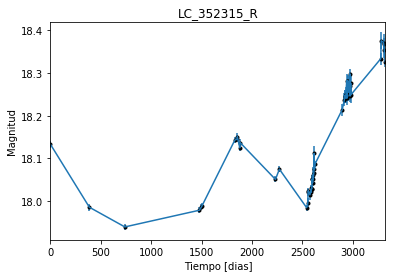

In [2]:
data = np.genfromtxt('LC_352315_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_352315_R')
plt.savefig("LC_352315_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

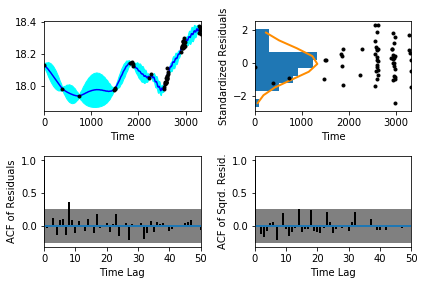

In [5]:
sample.assess_fit()

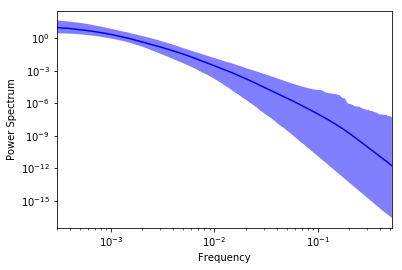

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

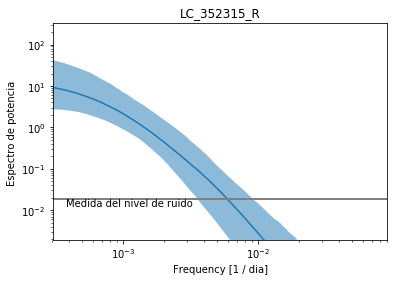

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_352315_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_352315_R')

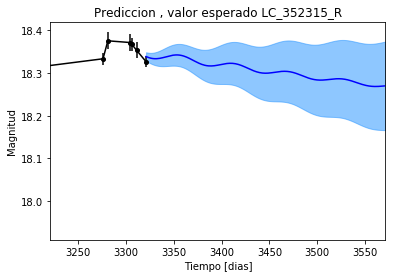

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_352315_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_352315_R')

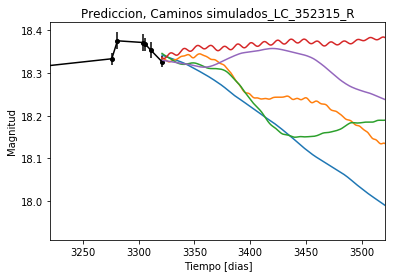

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_352315_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


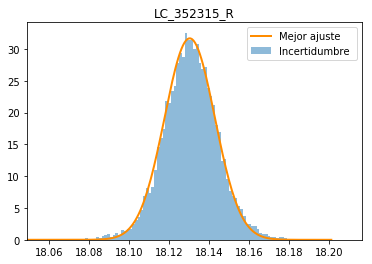

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_352315_R')
plt.savefig("Mejor_ajuste_LC_352315_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_352315_R')

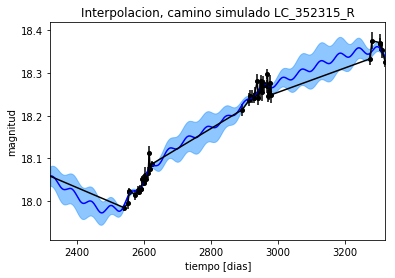

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_R')

Text(0.5,1,'Interpolacion, camino simulado LC_352315_R')

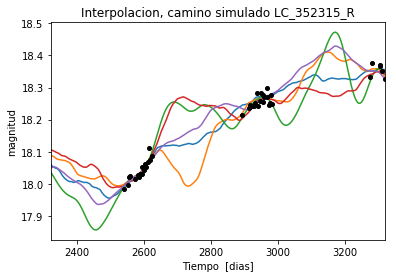

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 811.059082736
Median: 0.0225988866223
Standard deviation: 0.228768061297
68% credibility interval: [ 0.00147662  0.30588256]
95% credibility interval: [  4.04126850e-04   8.54747580e-01]
99% credibility interval: [  3.17445168e-04   1.01455078e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 45924.5595086
Median: 0.00268828669127
Standard deviation: 0.0841639624032
68% credibility interval: [ 0.00048768  0.02955061]
95% credibility interval: [ 0.00031837  0.25818057]
99% credibility interval: [  3.03423102e-04   5.90097122e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 285.056274924
Median: 0.00765561748384
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 731.831832698
Median: 158.449948662
Standard deviation: 1.78212874413
68% credibility interval: [ 156.45718926  159.82762687]
95% credibility interval: [ 153.84761898  160.78831327]
99% credibility interval: [ 151.95176394  161.21004112]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 803.867488611
Median: 0.685808825704
Standard deviation: 2.24128897336
68% credibility interval: [ 0.05006649  3.97165005]
95% credibility interval: [ 0.0165169   7.72361831]
99% credibility interval: [  0.01075187  10.28487858]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 499.232652689
Median: 0.707020789562
Standard deviation: 8.52125910854
68% credibility interval: [ 0.03951714  8.41219973]
95% credibility interval: [  5.19860333e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19743.1696094
Median: 5.28820152144e-24
Standard deviation: 6.74963690352e+16
68% credibility interval: [  3.96852029e-61   7.92766548e-04]
95% credibility interval: [  1.60718907e-88   1.60738123e+01]
99% credibility interval: [  4.01766134e-92   1.09286594e+02]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2790.3504051
Median: 18.0995261384
Standard deviation: 0.0692316991561
68% credibility interval: [ 18.04066021  18.1567835 ]
95% credibility interval: [ 17.96081555  18.23699848]
99% credibility interval: [ 17.87659282  18.3220842 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 634.11101021
Median: 0.0110810081849
Standard deviation: 0.241029856763
68% credibility interval: [ 0.          0.33925552]
95% credibility interval: [ 0.        0.883567]
99% credibility interval: [ 0.          0.99085334]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 634.11101021
Median: 0.0110810081849
Standard deviation: 0.241029856763
68% credibility interval: [ 0.          0.33925552]
95% credibility interval: [ 0.        0.883567]
99% credibility interval: [ 0.          0.99085334]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1623.51978062
Median: 0.0
Standard deviation: 0.000290794864601
68% credibility 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 731.831832698
Median: 158.449948662
Standard deviation: 1.78212874413
68% credibility interval: [ 156.45718926  159.82762687]
95% credibility interval: [ 153.84761898  160.78831327]
99% credibility interval: [ 151.95176394  161.21004112]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3033.76571278
Median: 0.017548210703
Standard deviation: 0.0184141583959
68% credibility interval: [ 0.01103594  0.03191742]
95% credibility interval: [ 0.00740208  0.06721079]
99% credibility interval: [ 0.00607656  0.1232276 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1369.9690373
Median: 1.08415240569
Standard deviation: 0.1826494665
68% credibility interval: [ 0.92644154  1.28892776]
95% credibility interval: [ 0.80262924  1.51226413]
99% credibility interval: [ 0.72946228  1.65517257]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 583.667193142
Median: 0.000153200292806
Standard deviation: 0.00368180979353
68% credibility interval: [  6.54374172e-06   1.95549721e-03]
95% credibility interval: [  4.57368544e-07   9.21693944e-03]
99% credibility interval: [  7.14004374e-08   2.11503540e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 811.059082736
Median: (-0.141992992384-0.293913807902j)
Standard deviation: 2.08796797181
68% credibility interval: [-1.92191679+0.j         -0.00927791-2.00822282j]
95% credibility interval: [ -5.37053744e+00+0.j         -2.53920388e-03-2.9229685j]
99% credibility interval: [ -6.37461058e+00+0.j          -1.99456681e-03-6.53360013j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 45924.5595086
Median: (-0.0168910034401+2.70750519204j)
Standard deviation: 1.60410796904
68% credibility interval: [-0.18567198+3.27817999j -0.00306418+0.j        ]
95% credibility interval: [-1.62219639+5.37619655j -0.00200041+0.j        ]
99% credibility interval: [ -3.70768957e+00+4.01427108j  -1.90646358e-03+0.j        ]
Posterior summar